# <img style="float: left; padding-right: 10px; width: 45px" src="fig/iacs.png"> Final Project: CSCI S-109A: Introduction to Data Science

<br/>
<div>
    <b>S-109A Introduction to Data Science</b><br/>
    Harvard University<br/>
    Summer 2018<br/>
    Instructors: Pavlos Protopapas, Kevin Rader
</div>
<hr style="display:block; border: 2px solid #b71010;" />


## Project: FIFA World Cup 2018 - Predictions
<b>Goal</b>: To be able to predict outcome of FIFA World Cup 2018 for: Round-16, Quater Finals, Semi Finals, and Final match(es) 

## Sections
* **Exploratory Data Analysis (EDA)**
    * *Visualize: Game & Game Results Distributions*
    * *Visualize: Top 20 Winners & Loosers (All Time)*
    * *Visualize: Top 20 Winners & Loosers (Last 10 years)*
    * *Visualize: Distribution of Team Rankings, and Rank Difference, grouped by Game Results*
* **Data Transformation**
    * *Add Feature: FIFA Team Ranks*
    * *Add Feature: Year Weight*
    * *Add Feature: FIFA World Cup Points*
    * *Add Feature: FIFA World Cup Participations*
    * *Add Feature: Team's overall player strength*
    * *Add Quadratic Terms*
    * *Normalize Predictors*
    * *Build Train & Test Datasets*
* **Building Models**
    * *Logistic Regression*
    * *Linear Discriminant Analysis*
    * *Quadratic Discriminant Analysis*
    * *K-Nearest Neighbors*
    * *Decision Tree Classifier*
    * *Random Forest Classifier*
    * *AdaBoost Classifier*
    * *Neural Network*
    * *Stacking - Baged Models (Bootstrapped n=25)*
* **Model Comparision**
* **Final Predictions**

<br/>
***Note: Webscrapping process and methods are included in the supplemental notebook: nb_webscrape.ipynb*** 

## Exploratory Data Analysis (EDA)

In this section we will load and analyze two datasets - international match results: `international_results.csv`, and players data: `PlayerAttributeData.csv`, `PlayerPersonalData.csv`, `PlayerPlayingPositionData.csv`, `CompleteDataset.csv`. We will also add new features to these datasource from additonal datasets build via web-scraping (detailed in supplemental notebook).


In [7]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from pandas import Series
import random
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import regularizers
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from matplotlib.pyplot import imshow


### Loading and analyzing datasets.

In [8]:
df_matches = pd.read_csv("datasets/fifa/international_results.csv")
print("df_matches: ", df_matches.shape)
print(df_matches.dtypes)
df_matches.head(10)


df_matches:  (39654, 9)
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


The `international_results.csv` dataset has $39,654$ observations, and 9 variables &mdash;
* `date`: when the match is held
* `home_team`: name of the home team
* `away_team`: name of the away team
* `home_score`: number of goals made by the home_team
* `away_score`: number of goals made by the away_team
* `tournament`: name of the tournament, ex: FIFA World Cup
* `city`: where the game is held
* `country`: where the game is held.
* `neutral`: False, if game venue is not in home_team's city/ country. True, otherwise.   



## Add Feature: Year, Net Score, and Game Result

In the section below, we are adding few additional variables &mdash;
* `neutral`: changed datatype to numeric binary (from boolean binary).
* `year`: when the game is held.
* `net_score`: home_score minus the away_score
* `result`: of the game from home_team prespective. 
    * 0: Lost, 
    * 1: Won, 
    * 2: Draw


In [9]:
def get_game_result(data_row):
    """A function which returns the result of the match
    for a given match observation
    
    Inputs: data row of international_results.csv dataset
    
    Returns:
        0: home_team lost the match
        1: home_team won the match
        2: match is a draw
    """
    if data_row["home_score"] > data_row["away_score"]:
        return 1
    elif data_row["home_score"] < data_row["away_score"]:
        return 0
    else:
        return 2
    
def get_net_score(data_row):
    """A function which returns the net score of the game,
    given as: home_score - away_score
    
    Inputs: data row of international_results.csv dataset
    
    Returns: net_score = home_score - away_score
    """
    return data_row["home_score"] - data_row["away_score"]

df_matches.neutral = df_matches.neutral.astype(int)
df_matches['year'] = pd.to_datetime(df_matches['date']).dt.year
df_matches['net_score'] = df_matches.apply(get_net_score, axis=1)
df_matches['result'] = df_matches.apply(get_game_result, axis=1)


In [10]:
# rearranging columns
colnames = ["date","year","home_team","away_team","home_score","away_score",
            "net_score","result","tournament","city","country","neutral"]
df_matches = df_matches[colnames]
df_matches.sample(10)


,date,year,home_team,away_team,home_score,away_score,net_score,result,tournament,city,country,neutral
30188,2008-06-14,2008,Puerto Rico,Honduras,2,2,0,2,FIFA World Cup qualification,Bayamón,Puerto Rico,0
22354,2000-01-20,2000,Malta,Qatar,2,0,2,1,Friendly,Attard,Malta,0
9153,1975-01-31,1975,Malawi,Mauritius,1,1,0,2,Friendly,Blantyre,Malawi,0
27481,2005-06-21,2005,Australia,Tunisia,0,2,-2,0,Confederations Cup,Leipzig,Germany,1
24328,2001-11-21,2001,Ethiopia,Zambia,1,2,-1,0,Friendly,Addis Abeba,Ethiopia,0
25169,2003-02-12,2003,Israel,Armenia,2,0,2,1,Friendly,Ramat-Gan,Israel,0
31288,2009-07-23,2009,USA,Honduras,2,0,2,1,Gold Cup,Chicago,USA,0
1309,1930-09-21,1930,Norway,Denmark,1,0,1,1,Nordic Championship,Oslo,Norway,0
27295,2005-03-29,2005,Ireland,China,1,0,1,1,Friendly,Dublin,Ireland,0
14157,1986-06-28,1986,France,Belgium,4,2,2,1,FIFA World Cup,Puebla,Mexico,1


## Visualize: Game & Game Results Distributions

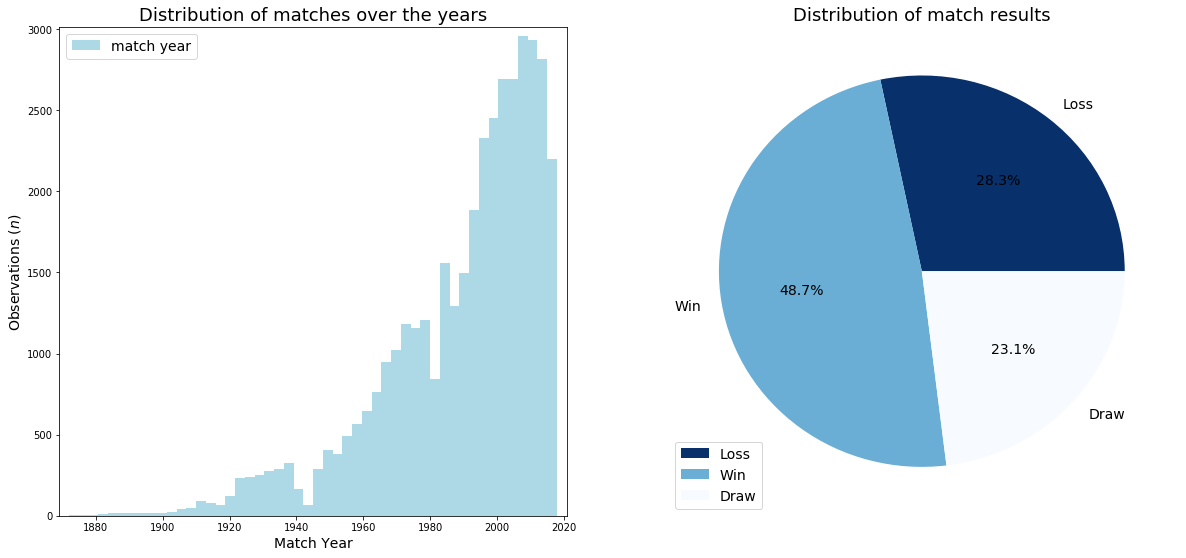

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20,9))
ax[0].set_title("Distribution of matches over the years", fontsize=18)
ax[0].margins(0.02)
ax[0].hist(df_matches["year"], bins=50, color="lightblue", label="match year")
ax[0].set_xlabel("Match Year", fontsize=14)
ax[0].set_ylabel("Observations ($n$)", fontsize=14)
ax[0].legend(loc=2, fontsize=14)

results = list(df_matches.groupby("result").agg({
    'date': 'count'
})["date"])
lbl_results = ["Loss", "Win", "Draw"] # 0: loose, 1: win, 2: draw
colors = plt.cm.Blues(np.linspace(1, 0, 3))
ax[1].set_title("Distribution of match results", fontsize=18)
ax[1].margins(0.02)
ax[1].pie(results, labels=lbl_results, colors=colors, autopct='%.1f%%', textprops={'fontsize': 14})
ax[1].legend(loc=3, fontsize=14)


From the plots above we can see that &mdash;
* data is significantly skewed over the year variable. The volume of data available between 1990 - 2018 (18 years) is far greater than the volume of data available between 1880 - 1990 (110 years). This trend could be for many reasons — (1) more games being played in recent years, (2) more data being captured & recorded for the games being played. We'll keep this trend in mind, while working with this dataset to build our learning models.
* data is also skewed over the result variable. There are far more observations with result=win, compared to combined observations of result=loss, and result=draw. As result variable will be our outcome variable, we would have preferred if the volume of data was balanced between these three levels of result variable. We'll have to keep this trend in mind, while working with this dataset to build our learning models.


## Visualize: Top 20 Winners & Loosers (All Time)

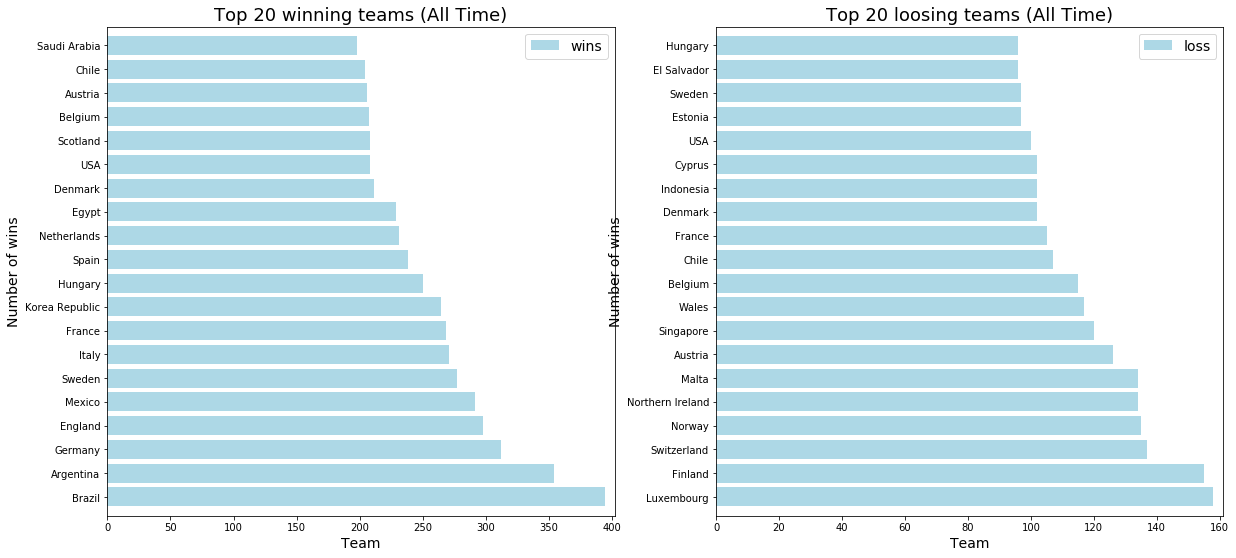

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,9))

# 0: loose, 1: win, 2: draw
df_winners = df_matches[df_matches.result==1].groupby(["home_team"]).agg({
    'date':'count' 
}).copy()
df_winners.columns = ["count"]
df_winners = df_winners.reset_index()
df_winners = df_winners.sort_values(by="count", ascending=False).copy()
ax[0].set_title("Top 20 winning teams (All Time)", fontsize=18)
ax[0].margins(0.02)
ax[0].barh(df_winners[:20]["home_team"], df_winners[:20]["count"], color="#add8e6", label="wins")
ax[0].set_xlabel("Team", fontsize=14)
ax[0].set_ylabel("Number of wins", fontsize=14)
ax[0].legend(loc=1, fontsize=14)

df_looser = df_matches[df_matches.result==0].groupby(["home_team"]).agg({
    'date':'count' 
}).copy()
df_looser.columns = ["count"]
df_looser = df_looser.reset_index()
df_looser = df_looser.sort_values(by="count", ascending=False).copy()
ax[1].set_title("Top 20 loosing teams (All Time)", fontsize=18)
ax[1].margins(0.02)
ax[1].barh(df_looser[:20]["home_team"], df_looser[:20]["count"], color="#add8e6", label="loss")
ax[1].set_xlabel("Team", fontsize=14)
ax[1].set_ylabel("Number of wins", fontsize=14)
ax[1].legend(loc=1, fontsize=14)


The plot above shows the &mdash;
* top-20 teams (left-plot) of all time: Brazil, Argentina, Germany, England, Mexico, ...
* bottom-20 teams (right-plot) of all time: Luxembourg, Finland, Switzerland, Norway, Malta, ...


## Visualize: Top 20 Winners & Loosers (Last 10 years)

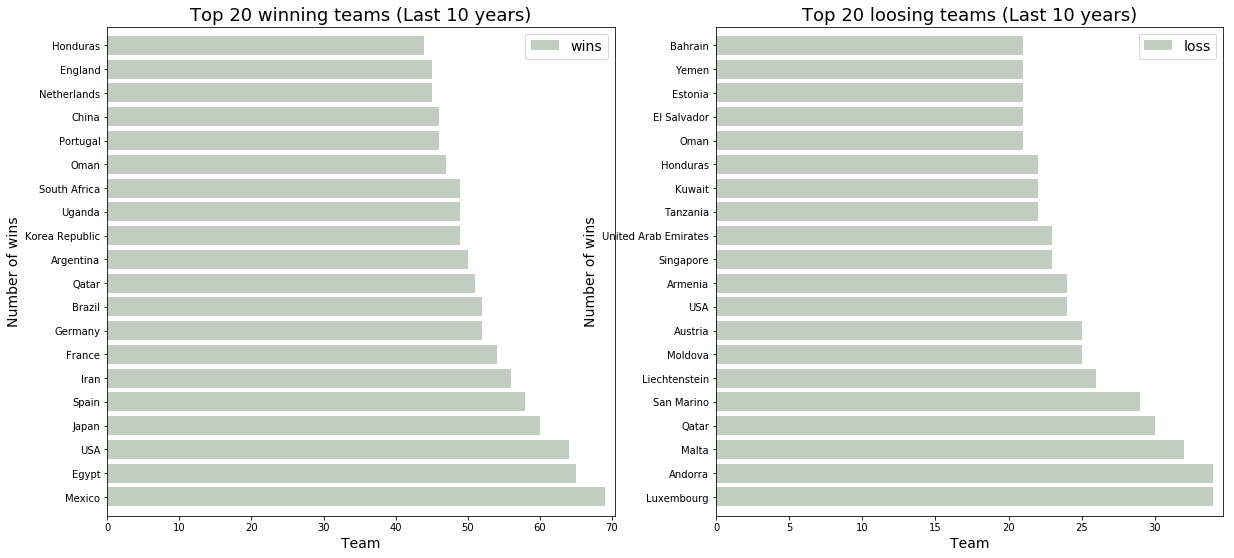

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,9))

# 0: loose, 1: win, 2: draw
df_winners = df_matches[(df_matches.result==1) & (df_matches.year>=2008)].groupby(["home_team"]).agg({
    'date':'count' 
}).copy()
df_winners.columns = ["count"]
df_winners = df_winners.reset_index()
df_winners = df_winners.sort_values(by="count", ascending=False).copy()
ax[0].set_title("Top 20 winning teams (Last 10 years)", fontsize=18)
ax[0].margins(0.02)
ax[0].barh(df_winners[:20]["home_team"], df_winners[:20]["count"], color="#c1cdc1", label="wins")
ax[0].set_xlabel("Team", fontsize=14)
ax[0].set_ylabel("Number of wins", fontsize=14)
ax[0].legend(loc=1, fontsize=14)

df_looser = df_matches[(df_matches.result==0) & (df_matches.year>=2008)].groupby(["home_team"]).agg({
    'date':'count' 
}).copy()
df_looser.columns = ["count"]
df_looser = df_looser.reset_index()
df_looser = df_looser.sort_values(by="count", ascending=False).copy()
ax[1].set_title("Top 20 loosing teams (Last 10 years)", fontsize=18)
ax[1].margins(0.02)
ax[1].barh(df_looser[:20]["home_team"], df_looser[:20]["count"], color="#c1cdc1", label="loss")
ax[1].set_xlabel("Team", fontsize=14)
ax[1].set_ylabel("Number of wins", fontsize=14)
ax[1].legend(loc=1, fontsize=14)


The plot above shows the &mdash;
* top-20 teams (left-plot) for last 10 years: Mexico, Egypt, USA, Japan, Spain, ...
* bottom-20 teams (right-plot) for last 10 years: Luxembourg, Andorra, Malta, Qatar, San Marino, ...

From the data above we can see that there is a significant change in both top & bottom team orders within last 10 years. We see the top 4 teams of all time: Brazil, Argentina, Germany, England, do not show up in top 5 teams for last 10 years. What could be the reason for this? 

<hr style="display:block; border: 2px solid #b71010;" />

# Data Transformation - adding new features

## Add Feature: FIFA Team Ranks

Let's add FIFA team ranking to our dataset &mdash;
* `ranking`: data scraped from FIFA website. 
    * `home_rank`: ranking of the home_team in the given year
    * `away_rank`: ranking of the away_team in the given year
    * `Note`: If no data available for given team for a given year, average rank (over the years) for that team will be applied


In [15]:
df_ranking = pd.read_pickle("datasets/ranking_data.pkl")
df_ranking.sample(10)


,date,year,team,rank
53970,2016-12-22,2016,Bermuda,187
14443,2000-10-11,2000,Sri Lanka,150
17477,2002-01-16,2002,Korea DPR,139
1396,1994-05-17,1994,Senegal,55
9063,1998-07-15,1998,Brunei Darussalam,176
1821,1994-07-21,1994,Liberia,136
18698,2002-08-14,2002,Sri Lanka,142
36433,2009-11-20,2009,British Virgin Islands,192
15148,2001-02-14,2001,Greece,43
42603,2012-06-06,2012,Kazakhstan,141


In [16]:
df_grouped_ranking = df_ranking.groupby(["year","team"]).agg({
    "rank": 'max'
}).copy()
df_grouped_ranking = df_grouped_ranking.reset_index()
df_grouped_ranking['year'] = pd.to_numeric(df_grouped_ranking['year'])
df_grouped_ranking['rank'] = pd.to_numeric(df_grouped_ranking['rank'])
df_grouped_ranking.sample(10)


,year,team,rank
3079,2008,Moldova,97
4450,2015,Cayman Islands,205
4087,2013,Iraq,98
2800,2007,Cyprus,82
2196,2004,Faroe Islands,137
717,1996,Wales,82
1731,2002,Aruba,189
31,1993,Chinese Taipei,161
4279,2014,Germany,2
3640,2011,England,8


In [17]:
def get_home_rank(data_row):
    """A function which returns the rank of the home_team
    for the given year
    
    Inputs: data row of international_results.csv dataset
    
    Returns: rank
    """    
    rank = df_grouped_ranking[(df_grouped_ranking["year"]==data_row["year"]) & (df_grouped_ranking["team"]==data_row["home_team"])]["rank"]  
    if len(rank) > 0:
        # apply exact rank        
        return list(rank)[0]
    else:
        # apply average rank
        ranks=list(df_grouped_ranking[(df_grouped_ranking["team"]==data_row["home_team"])]["rank"])
        if len(ranks) > 0:
            return int(round(np.mean(ranks)))
        else:
            return df_grouped_ranking["rank"].max()
    
def get_away_rank(data_row):
    """A function which returns the rank of the away_team
    for the given year
    
    Inputs: data row of international_results.csv dataset
    
    Returns: rank
    """  
    rank = df_grouped_ranking[(df_grouped_ranking["year"]==data_row["year"]) & (df_grouped_ranking["team"]==data_row["away_team"])]["rank"]
    if len(rank) > 0:
        # apply exact rank
        return list(rank)[0]
    else:
        # apply average rank
        ranks=list(df_grouped_ranking[(df_grouped_ranking["team"]==data_row["away_team"])]["rank"])
        if len(ranks) > 0:
            return int(round(np.mean(ranks)))
        else:
            return df_grouped_ranking["rank"].max()
        
def get_rank_diff(data_row):
    """A function which returns the difference in home_team and
    away_team rankings
    
    Inputs: data row of international_results.csv dataset
    
    Returns: rank difference (home_rank - away_rank)
    """
    return data_row["home_rank"] - data_row["away_rank"]        

df_matches['home_rank'] = df_matches.apply(get_home_rank, axis=1)
df_matches['away_rank'] = df_matches.apply(get_away_rank, axis=1)
df_matches['rank_diff'] = df_matches.apply(get_rank_diff, axis=1)


In [18]:
# rearranging columns
colnames = ["date","year","home_team","away_team","home_rank","away_rank","rank_diff","home_score",
            "away_score","net_score","result","tournament","city","country","neutral"]
df_matches = df_matches[colnames]

print("df_matches: ", df_matches.shape)
print(df_matches.dtypes)
df_matches.iloc[:,1:15].sample(10)


df_matches:  (39654, 15)
date          object
year           int64
home_team     object
away_team     object
home_rank      int64
away_rank      int64
rank_diff      int64
home_score     int64
away_score     int64
net_score      int64
result         int64
tournament    object
city          object
country       object
neutral        int64
dtype: object


,year,home_team,away_team,home_rank,away_rank,rank_diff,home_score,away_score,net_score,result,tournament,city,country,neutral
10078,1977,Peru,Poland,64,44,20,1,3,-2,0,Friendly,Lima,Peru,0
10554,1978,Botswana,Mozambique,128,106,22,0,2,-2,0,Friendly,Gaborone,Botswana,0
32495,2010,Guadeloupe,Antigua and Barbuda,209,131,78,1,0,1,1,CFU Caribbean Cup,Rivière-Pilote,Martinique,1
39220,2017,Kenya,Rwanda,88,93,-5,2,0,2,1,CECAFA Cup,Kakamega,Kenya,0
23329,2000,Vietnam,Indonesia,99,99,0,2,3,-1,0,AFF Championship,Bangkok,Thailand,1
30477,2008,United Arab Emirates,Korea DPR,99,94,5,1,2,-1,0,FIFA World Cup qualification,Abu Dhabi,United Arab Emirates,0
20058,1997,Congo DR,Congo,82,98,-16,1,1,0,2,FIFA World Cup qualification,Kinshasa,Zaïre,0
6804,1968,Suriname,French Guyana,146,209,-63,2,1,1,1,Friendly,Paramaribo,Suriname,0
13001,1984,Morocco,Senegal,51,64,-13,2,1,1,1,Friendly,Casablanca,Morocco,0
13705,1985,Saudi Arabia,Qatar,61,89,-28,1,0,1,1,UAFA Cup,Ta'if,Saudi Arabia,0


## Visualize: Distribution of Team Rankings, and Rank Difference, grouped by Game Results

Text(0,0.5,'Ranking Difference')

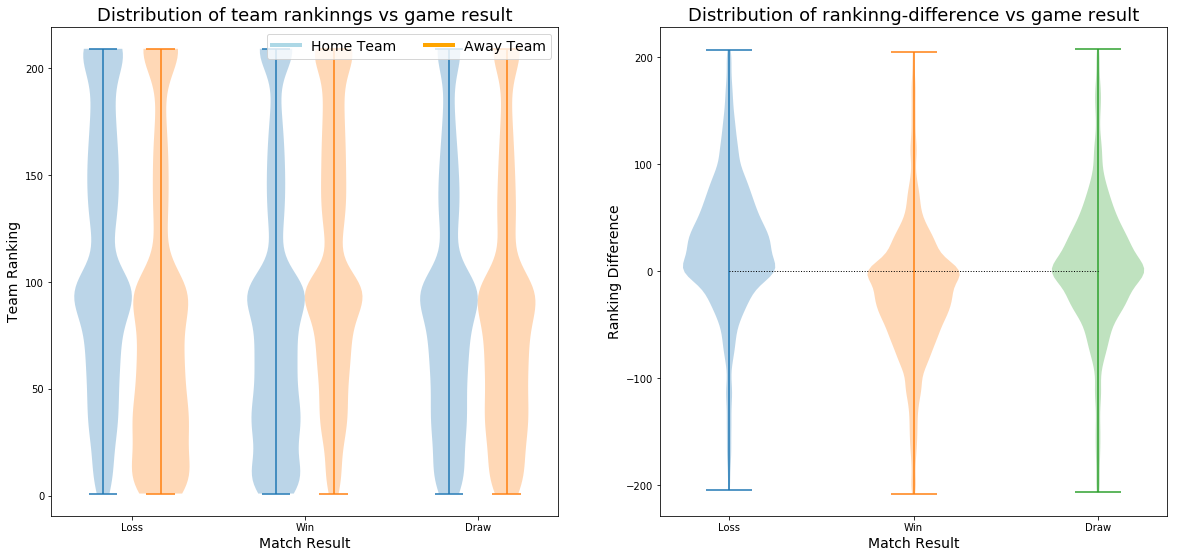

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20,9))

home_team = []
away_team = []
for cur_pos, cur_df in df_matches.groupby("result"):  
    home_team.append(cur_df[cur_df["year"]>=1993]["home_rank"].values)
    away_team.append(cur_df[cur_df["year"]>=1993]["away_rank"].values)

# 0: loose, 1: win, 2: draw
ax[0].set_title("Distribution of team rankinngs vs game result", fontsize=18)
ax[0].violinplot(home_team, positions=[1,2.5,4.0])
ax[0].violinplot(away_team, positions=[1.5,3.0,4.5])
ax[0].set_xticks([1.25, 2.75, 4.25])
ax[0].set_xticklabels(["Loss","Win","Draw"])
ax[0].set_xlabel("Match Result", fontsize=14)
ax[0].set_ylabel("Team Ranking", fontsize=14)
custom_lines = [Line2D([0], [0], color="lightblue", lw=4), Line2D([0], [0], color="orange", lw=4)]
ax[0].legend(custom_lines, ['Home Team', 'Away Team'], loc=1, ncol=2, fontsize=14)

diff0 = list(df_matches[df_matches.result==0]["rank_diff"])
diff1 = list(df_matches[df_matches.result==1]["rank_diff"])
diff2 = list(df_matches[df_matches.result==2]["rank_diff"])
ax[1].set_title("Distribution of rankinng-difference vs game result", fontsize=18)
ax[1].violinplot(diff0, positions=[1])
ax[1].violinplot(diff1, positions=[2])
ax[1].violinplot(diff2, positions=[3])
ax[1].set_xticks([1,2,3])
ax[1].set_xticklabels(["Loss","Win","Draw"])
ax[1].plot([1,3],[0,0], lw=1, ls="dotted", c="black")
ax[1].set_xlabel("Match Result", fontsize=14)
ax[1].set_ylabel("Ranking Difference", fontsize=14)


## Add Feature: Year Weight

`year_wt`: higher weightage to recent data, lower weightage to older data (on the scale of 0 to 2) 


In [20]:
# apply weight to year when match was played.
# recent year(s) performance should be treated as more relevant (higher weight)
# compared to older year(s) performance (lower weight)

df_matches['year_wt'] = df_matches['year']
min_year = min(df_matches["year"])
max_year = max(df_matches["year"])
range_year = max_year - min_year
weights = list(np.linspace(0,1,range_year+2)) 

for count, year in enumerate(range(min_year-1, max_year+1)):
    df_matches["year_wt"] = df_matches["year_wt"].replace(year, weights[count])
    
# rearranging columns
colnames = ["date","year","year_wt","home_team","away_team","home_rank","away_rank","rank_diff","home_score",
            "away_score","net_score","result","tournament","city","country","neutral"]
df_matches = df_matches[colnames]

print("df_matches: ", df_matches.shape)
print(df_matches.dtypes)
df_matches.sample(10)


df_matches:  (39654, 16)
date           object
year            int64
year_wt       float64
home_team      object
away_team      object
home_rank       int64
away_rank       int64
rank_diff       int64
home_score      int64
away_score      int64
net_score       int64
result          int64
tournament     object
city           object
country        object
neutral         int64
dtype: object


,date,year,year_wt,home_team,away_team,home_rank,away_rank,rank_diff,home_score,away_score,net_score,result,tournament,city,country,neutral
2269,1940-10-20,1940,0.469388,Germany,Bulgaria,6,52,-46,7,3,4,1,Friendly,Munich,Germany,0
4748,1960-10-14,1960,0.605442,Korea Republic,Vietnam Republic,49,209,-160,5,1,4,1,AFC Asian Cup,Seoul,Korea Republic,0
3278,1952-05-11,1952,0.551020,Romania,Czechoslovakia,28,209,-181,3,1,2,1,Friendly,Bucharest,Romania,0
16727,1992-02-02,1992,0.823129,USA,Russia,25,27,-2,2,1,1,1,Friendly,Pontiac,USA,0
31896,2010-05-26,2010,0.945578,Northern Ireland,Turkey,59,42,17,0,2,-2,0,Friendly,New Britain,USA,1
28676,2006-11-20,2006,0.918367,Northern Cyprus,Tajikistan,209,141,68,5,1,4,1,ELF Cup,Güzelyurt,Northern Cyprus,0
2149,1939-02-12,1939,0.462585,Portugal,Switzerland,12,35,-23,2,4,-2,0,Friendly,Lisbon,Portugal,0
19732,1996-09-01,1996,0.850340,Colombia,Chile,9,39,-30,4,1,3,1,FIFA World Cup qualification,Barranquilla,Colombia,0
32303,2010-10-09,2010,0.945578,Rwanda,Benin,132,72,60,0,3,-3,0,African Cup of Nations qualification,Kigali,Rwanda,0
8977,1974-07-03,1974,0.700680,Sweden,Yugoslavia,27,46,-19,2,1,1,1,FIFA World Cup,Düsseldorf,Germany,1


## Add Feature: FIFA World Cup Points

* `home_wc_points`: home_team's all time points for world cup games
* `away_wc_points`: away_team's all time points for world cup games


In [21]:
df_fifa_wc_ranking = pd.read_pickle("datasets/fifa_wc_ranking.pkl")
df_fifa_wc_ranking.head()


,rank,team,points,matches,win,draw,lost,goal_for,goal_against,points_avg,appearances
0,1,Brazil,227,104,70,17,17,221,102,2.2,20
1,2,Germany,218,106,66,20,20,224,121,2.1,18
2,3,Italy,156,83,45,21,17,128,77,1.9,18
3,4,Argentina,140,77,42,14,21,131,84,1.8,16
4,5,Spain,99,59,29,12,18,92,66,1.7,14


In [22]:
def get_home_wc_points(data_row):
    wc_points = df_fifa_wc_ranking[df_fifa_wc_ranking.team == data_row["home_team"]]["points"]
    if len(wc_points) > 0:
        return list(wc_points)[0]
    else:
        return 0

def get_away_wc_points(data_row):
    wc_points = df_fifa_wc_ranking[df_fifa_wc_ranking.team == data_row["away_team"]]["points"]
    if len(wc_points) > 0:
        return list(wc_points)[0]
    else:
        return 0

df_matches['home_wc_pts'] = df_matches.apply(get_home_wc_points, axis=1)
df_matches['away_wc_pts'] = df_matches.apply(get_away_wc_points, axis=1)
df_matches.sample(5)


,date,year,year_wt,home_team,away_team,home_rank,away_rank,rank_diff,home_score,away_score,net_score,result,tournament,city,country,neutral,home_wc_pts,away_wc_pts
17905,1993-10-05,1993,0.829932,Cyprus,Israel,75,71,4,2,2,0,2,Friendly,Limassol,Cyprus,0,0,2
15416,1989-05-18,1989,0.802721,Peru,Venezuela,64,84,-20,2,1,1,1,Friendly,Lima,Peru,0,15,0
34324,2012-10-05,2012,0.959184,Burma,Brunei,209,209,0,1,0,1,1,AFF Championship,Rangoon,Burma,0,0,0
33727,2012-02-29,2012,0.959184,Guinea-Bissau,Cameroon,175,71,104,0,1,-1,0,African Cup of Nations qualification,Bissau,Guinea-Bissau,0,0,19
26261,2004-03-31,2004,0.904762,Scotland,Romania,86,35,51,1,2,-1,0,Friendly,Glasgow,Scotland,0,19,29


## Add Feature: FIFA World Cup Participations

* `home_wc_plays`: home_team's world cup participations
* `away_wc_plays`: away_team's world cup participations


In [23]:
df_fifa_participations = pd.read_pickle("datasets/fifa_participations.pkl")
df_fifa_participations.head()


,team,participations,years
0,Brazil,20,"1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966..."
1,Germany,18,"1934, 1938, 1954, 1958, 1962, 1966, 1970, 1974..."
2,Italy,18,"1934, 1938, 1950, 1954, 1962, 1966, 1970, 1974..."
3,Argentina,16,"1930, 1934, 1958, 1962, 1966, 1974, 1978, 1982..."
4,Mexico,15,"1930, 1950, 1954, 1958, 1962, 1966, 1970, 1978..."


In [24]:
def get_home_wc_plays(data_row):
    wc_plays = df_fifa_participations[df_fifa_participations.team == data_row["home_team"]]["participations"]
    if len(wc_plays) > 0:
        return list(wc_plays)[0]
    else:
        return 0

def get_away_wc_plays(data_row):
    wc_plays = df_fifa_participations[df_fifa_participations.team == data_row["away_team"]]["participations"]
    if len(wc_plays) > 0:
        return list(wc_plays)[0]
    else:
        return 0

df_matches['home_wc_plays'] = df_matches.apply(get_home_wc_plays, axis=1)
df_matches['away_wc_plays'] = df_matches.apply(get_away_wc_plays, axis=1)
df_matches.sample(5)


,date,year,year_wt,home_team,away_team,home_rank,away_rank,rank_diff,home_score,away_score,net_score,result,tournament,city,country,neutral,home_wc_pts,away_wc_pts,home_wc_plays,away_wc_plays
10731,1979-05-09,1979,0.734694,Denmark,Sweden,24,27,-3,2,2,0,2,Friendly,Copenhagen,Denmark,0,26,61,4,11
20254,1997-04-02,1997,0.857143,Scotland,Austria,37,47,-10,2,0,2,1,FIFA World Cup qualification,Glasgow,Scotland,0,19,40,8,7
5017,1962-03-28,1962,0.619048,Argentina,Mexico,7,16,-9,1,0,1,1,Friendly,Buenos Aires,Argentina,0,140,56,16,15
38447,2017-03-22,2017,0.993197,Curaçao,El Salvador,209,99,110,1,1,0,2,Friendly,Willemstad,Curaçao,0,0,0,0,2
18390,1994-09-07,1994,0.836735,Georgia,Moldova,93,149,-56,0,1,-1,0,UEFA Euro qualification,Tbilisi,Georgia,0,0,0,0,0


In [25]:
df_matches.to_pickle("datasets/matches_data.pkl")

## Add Feature: Team's overall player strength

In [26]:
df_players = pd.read_pickle("datasets/sofifa_players.pkl")
df_players_grouped = df_players.groupby(["year","team"]).agg({"age":np.mean,"overall":np.mean}).copy()
df_players_grouped = df_players_grouped.reset_index()
df_players_grouped.columns = ["year","team","age_mean","overall_mean"]
df_players_grouped["age_wt"] = df_players_grouped["age_mean"] - df_players_grouped["age_mean"].mean()
df_players_grouped["perf_wt"] = df_players_grouped["overall_mean"] - df_players_grouped["overall_mean"].mean()
df_matches.to_pickle("datasets/df_players_grouped.pkl")

def get_home_player_agewt(data_row):
    age_wt = list(df_players_grouped[(df_players_grouped.year==data_row["year"])&(df_players_grouped.team==data_row["home_team"])]["age_wt"])
    if len(age_wt) > 0:
        return age_wt[0]
    else:
        return 0
    
def get_away_player_agewt(data_row):
    age_wt = list(df_players_grouped[(df_players_grouped.year==data_row["year"])&(df_players_grouped.team==data_row["away_team"])]["age_wt"])
    if len(age_wt) > 0:
        return age_wt[0]
    else:
        return 0  
    
def get_home_player_prfwt(data_row):
    prf_wt = list(df_players_grouped[(df_players_grouped.year==data_row["year"])&(df_players_grouped.team==data_row["home_team"])]["perf_wt"])
    if len(prf_wt) > 0:
        return prf_wt[0]
    else:
        return 0
    
def get_away_player_prfwt(data_row):
    prf_wt = list(df_players_grouped[(df_players_grouped.year==data_row["year"])&(df_players_grouped.team==data_row["away_team"])]["perf_wt"])
    if len(prf_wt) > 0:
        return prf_wt[0]
    else:
        return 0      

df_matches['home_p_age_wt'] = df_matches.apply(get_home_player_agewt, axis=1)
df_matches['away_p_age_wt'] = df_matches.apply(get_away_player_agewt, axis=1)
df_matches['home_p_prf_wt'] = df_matches.apply(get_home_player_prfwt, axis=1)
df_matches['away_p_prf_wt'] = df_matches.apply(get_away_player_prfwt, axis=1)

df_matches.sample(20)


,date,year,year_wt,home_team,away_team,home_rank,away_rank,rank_diff,home_score,away_score,...,country,neutral,home_wc_pts,away_wc_pts,home_wc_plays,away_wc_plays,home_p_age_wt,away_p_age_wt,home_p_prf_wt,away_p_prf_wt
34018,2012-06-12,2012,0.959184,Bahrain,Kuwait,97,96,1,0,1,...,Egypt,1,0,1,0,1,2.128396,0.000000,-3.927061,0.000000
27083,2004-12-17,2004,0.904762,Bahrain,Saudi Arabia,64,30,34,3,0,...,Qatar,1,0,8,0,4,0.000000,0.000000,0.000000,0.000000
10103,1977-07-03,1977,0.721088,Argentina,Yugoslavia,7,46,-39,1,0,...,Argentina,0,140,0,16,0,0.000000,0.000000,0.000000,0.000000
13721,1985-07-14,1985,0.775510,Fiji,Tahiti,155,163,-8,1,2,...,Fiji,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
14095,1986-05-28,1986,0.782313,China,Iran,209,209,0,2,1,...,China,0,0,6,0,4,0.000000,0.000000,0.000000,0.000000
14103,1986-06-02,1986,0.782313,Russia,Hungary,27,62,-35,6,0,...,Mexico,1,59,48,10,9,0.000000,0.000000,0.000000,0.000000
28883,2007-03-24,2007,0.925170,Austria,Ghana,94,47,47,1,1,...,Austria,0,40,15,7,3,-0.141445,-1.023778,-5.236584,-1.166191
3543,1954-03-21,1954,0.564626,Israel,Yugoslavia,60,46,14,0,1,...,Israel,0,2,0,1,0,0.000000,0.000000,0.000000,0.000000
30184,2008-06-14,2008,0.931973,Malawi,Egypt,138,35,103,1,0,...,Malawi,0,0,2,0,2,-3.871604,-0.093826,-5.927061,2.517384
17474,1993-04-13,1993,0.829932,Vietnam,Singapore,135,75,60,2,3,...,Qatar,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000


<hr style="display:block; border: 2px solid #b71010;" />

## Add Quadratic Terms, Normalize Predictors, Build Train & Test Datasets

In [27]:
df_matches.to_pickle("datasets/matches_data.pkl")
df_matches = pd.read_pickle("datasets/matches_data.pkl")
df_matches["result"] = df_matches["result"].replace(2,0)

all_features = ['date', 'year', 'year_wt', 'home_team', 'away_team', 'home_rank',
                'away_rank', 'rank_diff', 'home_score', 'away_score', 'net_score',
                'result', 'tournament', 'city', 'country', 'neutral', 'home_wc_pts',
                'away_wc_pts', 'home_wc_plays', 'away_wc_plays', 'home_p_age_wt',
                'away_p_age_wt', 'home_p_prf_wt', 'away_p_prf_wt']

final_features = ["year_wt","home_team","away_team","home_rank","away_rank",
                    "neutral","home_wc_pts","away_wc_pts","home_wc_plays",
                    "away_wc_plays","home_p_age_wt","away_p_age_wt",
                    "home_p_prf_wt","away_p_prf_wt","result"]

df_final =  df_matches[df_matches.year >= 2006][final_features]

scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(df_final["home_rank"].values.reshape(-1,1))
df_final["home_rank"] = scaler.transform(df_final["home_rank"].values.reshape(-1,1))
df_final["home_rank"] = abs(df_final["home_rank"]-1)

scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(df_final["away_rank"].values.reshape(-1,1))
df_final["away_rank"] = scaler.transform(df_final["away_rank"].values.reshape(-1,1))
df_final["away_rank"] = abs(df_final["away_rank"]-1)

scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(df_final["home_wc_pts"].values.reshape(-1,1))
df_final["home_wc_pts"] = scaler.transform(df_final["home_wc_pts"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(df_final["away_wc_pts"].values.reshape(-1,1))
df_final["away_wc_pts"] = scaler.transform(df_final["away_wc_pts"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(df_final["home_wc_plays"].values.reshape(-1,1))
df_final["home_wc_plays"] = scaler.transform(df_final["home_wc_plays"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(df_final["away_wc_plays"].values.reshape(-1,1))
df_final["away_wc_plays"] = scaler.transform(df_final["away_wc_plays"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(-1, 1)).fit(df_final["home_p_age_wt"].values.reshape(-1,1))
df_final["home_p_age_wt"] = scaler.transform(df_final["home_p_age_wt"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(-1, 1)).fit(df_final["away_p_age_wt"].values.reshape(-1,1))
df_final["away_p_age_wt"] = scaler.transform(df_final["away_p_age_wt"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(-1, 1)).fit(df_final["home_p_prf_wt"].values.reshape(-1,1))
df_final["home_p_prf_wt"] = scaler.transform(df_final["home_p_prf_wt"].values.reshape(-1,1))

scaler = MinMaxScaler(copy=True, feature_range=(-1, 1)).fit(df_final["away_p_prf_wt"].values.reshape(-1,1))
df_final["away_p_prf_wt"] = scaler.transform(df_final["away_p_prf_wt"].values.reshape(-1,1))

df_final["home_p_age_wt_2"] = df_final["home_p_age_wt"]**2
df_final["away_p_age_wt_2"] = df_final["away_p_age_wt"]**2
df_final["home_p_prf_wt_2"] = df_final["home_p_prf_wt"]**2
df_final["away_p_prf_wt_2"] = df_final["away_p_prf_wt"]**2

df_final["home_p_age_wt_3"] = df_final["home_p_age_wt"]**3
df_final["away_p_age_wt_3"] = df_final["away_p_age_wt"]**3
df_final["home_p_prf_wt_3"] = df_final["home_p_prf_wt"]**3
df_final["away_p_prf_wt_3"] = df_final["away_p_prf_wt"]**3

df_final["home_p_age_perf_wt"] = df_final["home_p_age_wt"] * df_final["home_p_prf_wt"]
df_final["away_p_age_perf_wt"] = df_final["away_p_age_wt"] * df_final["away_p_prf_wt"]

df_final = pd.get_dummies(df_final)
x_df_final = df_final.drop(["result"], axis=1).copy()
y_df_final = df_final["result"].copy()

X_train, X_test, y_train, y_test = train_test_split(x_df_final, y_df_final, test_size=0.1, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(10571, 576) (1175, 576) (10571,) (1175,)


/Volumes/Data/ramandeepharjai/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<hr style="display:block; border: 2px solid #b71010;" />

# Building Models
* ### Single Models
    * *Logistic Regression*
    * *Linear Discriminant Analysis*
    * *Quadratic Discriminant Analysis*
    * *K-Nearest Neighbors*
    * *Decision Tree Classifier*
* ### Ensemble Models
    * *Random Forest Classifier*
    * *AdaBoost Classifier*
    * *Stacking*
* ### Neural Network


In [28]:
# defining dictionary objects to store -
#    * tuned models
#    * predictions obtained from tuned models
#    * probabilities obtained from tuned models
#    * execution time to train the model

# uncomment below lines to build the dictionaries again
# models = {}
# probs = {}
# scores = {}
# exeTime = {}


## Logistic Regression

In [32]:
modelName = "logistic"

# build parameters list to find best parameter values
parameters = {
    'C':[.01, 1, 10, 100, 1000],
    'solver':['newton-cg', 'lbfgs', 'sag'],
    'fit_intercept':[True,False]
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
model = LogisticRegression(penalty="l2", max_iter=1000)
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[Logistic Regression]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)


[Logistic Regression]
Execution time : 4.32 minutes
Train Accuracy : 0.7409
Test Accuracy  : 0.7106

Best Model:
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


## Linear Discriminant Analysis

In [33]:
modelName = "lda"

# build parameters list to find best parameter values
parameters = {
    'shrinkage':[.001, .01, .1, 1],
    'solver':['lsqr', 'eigen']
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
model = LinearDiscriminantAnalysis()
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[Linear Discriminant Analysis]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)

# save dictionaries to disk
np.save("datasets/dict_models.npy", models)
np.save("datasets/dict_scores.npy", scores)
np.save("datasets/dict_probs.npy", probs)
np.save("datasets/dict_exeTime.npy", exeTime)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    4.1s finished


[Linear Discriminant Analysis]
Execution time : 0.07 minutes
Train Accuracy : 0.7405
Test Accuracy  : 0.7140

Best Model:
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
              solver='lsqr', store_covariance=False, tol=0.0001)


## Quadratic Discriminant Analysis

In [36]:
modelName = "qda"

# build parameters list to find best parameter values
parameters = {
    'reg_param':[.001, .01, .1, 1]
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
model = QuadraticDiscriminantAnalysis()
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[Quadratic Discriminant Analysis]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)

# save dictionaries to disk
np.save("datasets/dict_models.npy", models)
np.save("datasets/dict_scores.npy", scores)
np.save("datasets/dict_probs.npy", probs)
np.save("datasets/dict_exeTime.npy", exeTime)


[Quadratic Discriminant Analysis]
Execution time : 0.15 minutes
Train Accuracy : 0.7086
Test Accuracy  : 0.6868

Best Model:
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
               store_covariance=False, store_covariances=None, tol=0.0001)


## K-Nearest Neighbors

In [37]:
modelName = "knn"

# build parameters list to find best parameter values
parameters = {
    'n_neighbors':[10, 20, 40, 60],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree']
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
model = KNeighborsClassifier()
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[K-Nearest Neighbors]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)

# save dictionaries to disk
np.save("datasets/dict_models.npy", models)
np.save("datasets/dict_scores.npy", scores)
np.save("datasets/dict_probs.npy", probs)
np.save("datasets/dict_exeTime.npy", exeTime)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 16.1min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 29.1min finished


[K-Nearest Neighbors]
Execution time : 29.1 minutes
Train Accuracy : 0.9886
Test Accuracy  : 0.6528

Best Model:
 KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')


## Decision Tree Classifier

In [38]:
modelName = "dtc"

# build parameters list to find best parameter values
parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[5,10,50,30,60]
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
model = DecisionTreeClassifier()
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[Decision Tree Classifier]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)

# save dictionaries to disk
np.save("datasets/dict_models.npy", models)
np.save("datasets/dict_scores.npy", scores)
np.save("datasets/dict_probs.npy", probs)
np.save("datasets/dict_exeTime.npy", exeTime)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.0s finished


[Decision Tree Classifier]
Execution time : 0.12 minutes
Train Accuracy : 0.7034
Test Accuracy  : 0.6689

Best Model:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')


# Ensemble Methods

## Random Forest Classifier

In [39]:
modelName = "rfc"

# build parameters list to find best parameter values
parameters = {
    'n_estimators':[20,40,80,100,200],
    'criterion':['gini','entropy'],
    'max_depth':[5,10,50,30,60]
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
model = RandomForestClassifier(bootstrap=True)
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[Random Forest Classifier]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)

# save dictionaries to disk
np.save("datasets/dict_models.npy", models)
np.save("datasets/dict_scores.npy", scores)
np.save("datasets/dict_probs.npy", probs)
np.save("datasets/dict_exeTime.npy", exeTime)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.4min finished


[Random Forest Classifier]
Execution time : 2.49 minutes
Train Accuracy : 0.9501
Test Accuracy  : 0.6868

Best Model:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## AdaBoost Classifier

In [41]:
modelName = "ada"

# build parameters list to find best parameter values
parameters = {
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'n_estimators':[10,20,40,80,100]
}

# build base estimator model, and run GridSearchCV to find best model
start_time = time.time()
rf_model = RandomForestClassifier(bootstrap=True)
model = AdaBoostClassifier(base_estimator=rf_model)
gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=4, verbose=1).fit(X_train, y_train)
exe_time = round((time.time() - start_time)/60, 2)

# compute scores, and probabilities
train_score = round(accuracy_score(y_train, gs.predict(X_train)),4)
test_score = round(accuracy_score(y_test, gs.predict(X_test)),4)
train_prob = gs.predict_proba(X_train)
test_prob = gs.predict_proba(X_test)

# store model, score, and probabilities in a dictionary
exeTime.update({modelName:exe_time})
scores.update({modelName:[train_score,test_score]})
probs.update({modelName:[train_prob,test_prob]})
models.update({modelName:gs.best_estimator_})

# display scores and best model
print("[Random Forest Classifier]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(train_score))
print("Test Accuracy  : {:>0.4f}".format(test_score))
print("\nBest Model:\n", gs.best_estimator_)

# save dictionaries to disk
np.save("datasets/dict_models.npy", models)
np.save("datasets/dict_scores.npy", scores)
np.save("datasets/dict_probs.npy", probs)
np.save("datasets/dict_exeTime.npy", exeTime)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  9.0min finished


[Random Forest Classifier]
Execution time : 9.61 minutes
Train Accuracy : 0.9886
Test Accuracy  : 0.6621

Best Model:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=0.001, n_estimators=100, random_state=None)


## Neural Network

In [48]:
X = X_train.copy(deep=True).reset_index(drop=True)
Y = y_train.copy().values.reshape(-1,1)

counter=1
nn_cvscores=[]
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
start_time = time.time()
for train, test in kfold.split(X, Y):
    print("KFold: {}".format(counter), end="\r")
    nn_model = Sequential([
        Dense(576, input_shape=(576,), kernel_initializer='normal', activation='relu'),
        Dense(144, kernel_initializer='normal', activation='relu'),
        Dense(36, kernel_initializer='normal', activation='relu'),
        Dense(9, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='sigmoid')
    ])
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    mfit = nn_model.fit(X.iloc[train], Y[train], epochs=50, validation_split=0.2, shuffle=True, verbose=0)
    nn_scores = nn_model.evaluate(X.iloc[test], Y[test], verbose=0)
    nn_score = round(nn_scores[1],4)
    nn_cvscores.append(nn_score)
    counter+=1
end_time = time.time()
exe_time = round((end_time - start_time)/60, 2)

# compute scores, and probabilities
nn_train_score = round(accuracy_score(y_train, nn_model.predict_classes(X_train)),4)
nn_test_score = round(accuracy_score(y_test, nn_model.predict_classes(X_test)),4)

# store model, score, and probabilities in a dictionary
exeTime.update({'nn':exe_time})
scores.update({'nn':[train_score,test_score]})

# display scores and best model
print("[Neural Network]")
print("Execution time : {} minutes".format(exe_time))
print("Train Accuracy : {:>0.4f}".format(nn_train_score))
print("Test Accuracy  : {:>0.4f}".format(nn_test_score))
print(nn_model.summary())


[Neural Network]
Execution time : 9.49 minutes
Train Accuracy : 0.8821
Test Accuracy  : 0.6638
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 576)               332352    
_________________________________________________________________
dense_97 (Dense)             (None, 144)               83088     
_________________________________________________________________
dense_98 (Dense)             (None, 36)                5220      
_________________________________________________________________
dense_99 (Dense)             (None, 9)                 333       
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 10        
Total params: 421,003
Trainable params: 421,003
Non-trainable params: 0
_________________________________________________________________
None


## Stacking - Baged Models (Bootstrapped n=25)

### Stacking 25-bagged (Logistic, LDA, QDA, KNN, Decision Tree, Random Forest, and ADABoost) models, and taking a popular vote

In [43]:
stacked_results = pd.DataFrame()

N=25
all_results = {}
for model in models.keys():
    counter = 1
    print("[{}]: computing bootstraped results...".format(model))
    train_results=[]
    test_results=[]
    for i in range(N):
        X, y = resample(X_train, y_train)
        fit = models[model].fit(X, y)
        train_results.append(round(accuracy_score(y, fit.predict(X)),4))
        test_results.append(round(accuracy_score(y_test, fit.predict(X_test)),4))
        colname = model + "." + str(counter)
        stacked_results[colname] = fit.predict(X_test)
        counter+=1
    all_results.update({model:[train_results, test_results]})

def popular_vote(row):
    if row.mean() >= 0.5:
        return 1
    else:
        return 0   
    
stacked_results["results"] = stacked_results.apply(popular_vote, axis=1)
st_train_score = round(np.mean(train_results),4)
st_test_score = round(accuracy_score(y_test, stacked_results["results"]),4)
print("Train Accuracy  : {:>0.4f}".format(st_train_score))
print("Test Accuracy  : {:>0.4f}".format(st_test_score))
stacked_results.sample(10)


[logistic]: computing bootstraped results...
[lda]: computing bootstraped results...
[qda]: computing bootstraped results...


/Volumes/Data/ramandeepharjai/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[knn]: computing bootstraped results...
[dtc]: computing bootstraped results...
[rfc]: computing bootstraped results...
[ada]: computing bootstraped results...
Train Accuracy  : 0.9944
Test Accuracy  : 0.7013


,logistic.1,logistic.2,logistic.3,logistic.4,logistic.5,logistic.6,logistic.7,logistic.8,logistic.9,logistic.10,...,ada.17,ada.18,ada.19,ada.20,ada.21,ada.22,ada.23,ada.24,ada.25,results
884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1137,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
858,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
531,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
793,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# save dataframe, and dictionaries to disk
# which are used for final predictions
np.save("datasets/dict_models_final.npy", models)
X_test.to_pickle("datasets/X_test_final.pkl")
df_matches.to_pickle("datasets/matches_data_final.pkl")

<hr style="display:block; border: 2px solid #b71010;" />

## Model Comparision

|-----------------------------------------|
| model     | train (mean) |  test (mean) |
|-----------------------------------------|
| stacking  |       0.9944 |       0.7013 |
| neural n. |       0.8821 |       0.6638 |
| logistic  |       0.7578 |        0.702 |
| lda       |       0.7538 |       0.6999 |
| qda       |       0.7343 |       0.6747 |
| knn       |       0.9941 |       0.6514 |
| dtc       |        0.725 |       0.6542 |
| rfc       |       0.9685 |        0.667 |
| ada       |       0.9944 |       0.6671 |
|-----------------------------------------|


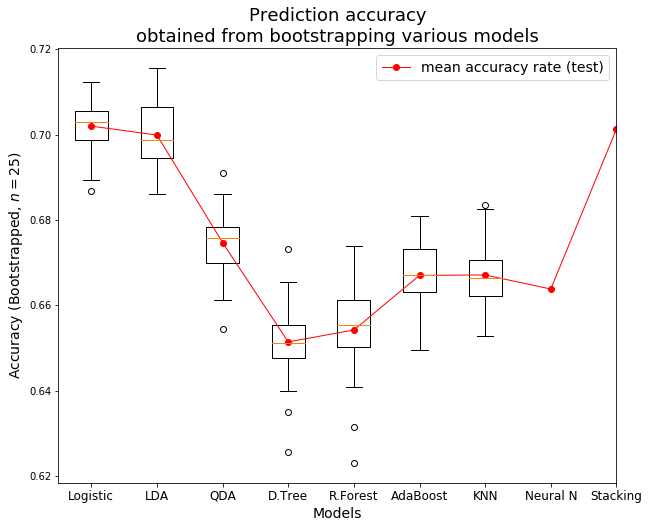

In [65]:
all_test_results=[]
test_means=[]
train_means=[]

print("|-----------------------------------------|")
print("| {:<9} | {:>12} | {:>12} |".format("model", "train (mean)", "test (mean)"))
print("|-----------------------------------------|")
print("| {:<9} | {:>12} | {:>12} |".format("stacking", st_train_score, st_test_score))
print("| {:<9} | {:>12} | {:>12} |".format("neural n.", nn_train_score, nn_test_score))
for key in all_results.keys():
    all_test_results.append(all_results[key][1])
    trainmean = round(np.mean(all_results[key][0]),4)
    testmean = round(np.mean(all_results[key][1]),4)
    test_means.append(testmean)
    train_means.append(trainmean)
    print("| {:<9} | {:>12} | {:>12} |".format(key, trainmean, testmean))
print("|-----------------------------------------|")

test_means.append(nn_test_score)
test_means.append(st_test_score)
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title("Prediction accuracy\nobtained from bootstrapping various models", fontsize=18)
ax.boxplot(all_test_results)
ax.plot(range(1,10), test_means, marker="o", lw=1, ls="solid", c="red", label="mean accuracy rate (test)")
ax.set_xlabel("Models", fontsize=14)
ax.set_ylabel("Accuracy (Bootstrapped, $n=25$)", fontsize=14)
ax.set_xticks(range(1,10))
ax.set_xticklabels(['Logistic', 'LDA', 'QDA', 'D.Tree', 'R.Forest', 'AdaBoost', 'KNN', 'Neural N', 'Stacking'], fontsize=12)
ax.legend(loc=1, fontsize=14)


<hr style="display:block; border: 2px solid #b71010;" />

# Final Predictions 
## FIFA World-Cup 2018 - Round-16, Quater Final, Semi Final, and Final matches

In [66]:
# load final dataset and tuned models
models = np.load("datasets/dict_models_final.npy").item()
df_matches = pd.read_pickle("datasets/matches_data_final.pkl")
X_test = pd.read_pickle("datasets/X_test.pkl")

def design_match_data(teams):
        home_team = teams[0]
        away_team = teams[1]        
        X = pd.DataFrame(list(np.zeros((1,576))), columns=X_test.columns)
        
        # set predictors
        X["year_wt"]=1
        X["home_rank"]=df_matches[(df_matches.home_team==home_team)&(df_matches.year==2018)].iloc[0]["home_rank"]
        X["away_rank"]=df_matches[(df_matches.home_team==away_team)&(df_matches.year==2018)].iloc[0]["home_rank"]
        
        if home_team != "Russia":
            X["neutral"]=0
        else:
            X["neutral"]=1
            
        X["home_wc_pts"]=df_matches[(df_matches.home_team==home_team)&(df_matches.year==2018)].iloc[0]["home_wc_pts"]
        X["away_wc_pts"]=df_matches[(df_matches.home_team==away_team)&(df_matches.year==2018)].iloc[0]["away_wc_pts"]
        X["home_wc_plays"]=df_matches[(df_matches.home_team==home_team)&(df_matches.year==2018)].iloc[0]["home_wc_plays"]
        X["away_wc_plays"]=df_matches[(df_matches.home_team==away_team)&(df_matches.year==2018)].iloc[0]["away_rank"]
        
        home_p_age_wt = df_matches[(df_matches.home_team==home_team)&(df_matches.year==2018)].iloc[0]["home_p_age_wt"]
        home_p_prf_wt = df_matches[(df_matches.home_team==home_team)&(df_matches.year==2018)].iloc[0]["home_p_prf_wt"]
        away_p_age_wt = df_matches[(df_matches.home_team==away_team)&(df_matches.year==2018)].iloc[0]["away_p_age_wt"]
        away_p_prf_wt = df_matches[(df_matches.home_team==away_team)&(df_matches.year==2018)].iloc[0]["away_p_prf_wt"]
        X["home_p_age_wt"]=home_p_age_wt
        X["away_p_age_wt"]=away_p_age_wt
        X["home_p_prf_wt"]=home_p_prf_wt
        X["away_p_prf_wt"]=away_p_prf_wt
        X["home_p_age_wt_2"]=home_p_age_wt**2
        X["away_p_age_wt_2"]=away_p_age_wt**2
        X["home_p_prf_wt_2"]=home_p_prf_wt**2
        X["away_p_prf_wt_2"]=away_p_prf_wt**2
        X["home_p_age_wt_3"]=home_p_age_wt**3
        X["away_p_age_wt_3"]=away_p_age_wt**3
        X["home_p_prf_wt_3"]=home_p_prf_wt**3
        X["away_p_prf_wt_3"]=away_p_prf_wt**3
        X["home_p_age_perf_wt"]=home_p_age_wt*home_p_prf_wt
        X["away_p_age_perf_wt"]=away_p_age_wt*away_p_prf_wt
        
        # set dummy variables for home & away teams
        home_col = "home_team_" + home_team
        away_col = "away_team_" + away_team
        X[home_col] = 1
        X[away_col] = 1
        
        # return dataset
        return X

def predict_outcome(match):
    X = design_match_data(match)
    p_results = []
    for key in models.keys():
        p_results.append(models[key].predict(X)[0])
    return p_results

def popular_win(arr,boundry):
    if boundry==0: decision = 0.4    
    if boundry==1: decision = 0.5
    if boundry==2: decision = 0.6
    if np.mean(arr) >= decision: return 0
    else: return 1 
    
# FIFA World Cup 2018 - Round-16 Match line-up
round16_matches = [['Uruguay','Portugal'], ['France','Argentina'], ['Brazil','Mexico'], ['Japan','Belgium'], 
                   ['Spain','Russia'], ['Denmark','Croatia'], ['Sweden','Switzerland'], ['Colombia','England']]
round16_results = []
qfinal_matches = []
qfinal_results = []
sfinal_matches=[]
sfinal_results=[]
final_match=[]
final_result=[]
msg="{:<12}  :  {:<8}  -vs-  {:<11}  :  {:<10} wins"

print("\nFINAL PREDICTIONS")
print("-----------------\n")

# predict Round-16 outcome
for match in round16_matches:
    winner = match[popular_win(predict_outcome(match),0)]
    round16_results.append(winner)
    print(msg.format("Round 16", match[0], match[1], winner))
    
# predict Quater-Final outcome
print("\n")
qfinal_matches = [[round16_results[0],round16_results[1]], [round16_results[2],round16_results[3]], 
                  [round16_results[4],round16_results[5]], [round16_results[6],round16_results[7]]]
for match in qfinal_matches:
    winner = match[popular_win(predict_outcome(match),2)]
    qfinal_results.append(winner)
    print(msg.format("Quater Final", match[0], match[1], winner))
    
# predict Semi-Final outcome
print("\n")
sfinal_matches = [[qfinal_results[0],qfinal_results[1]], [qfinal_results[3],qfinal_results[2]]]
for match in sfinal_matches:
    winner = match[popular_win(predict_outcome(match),0)]
    sfinal_results.append(winner)
    print(msg.format("Semi Final", match[0], match[1], winner))
    
# predict Final outcome
print("\n")
final_match = [[sfinal_results[0],sfinal_results[1]]]
for match in final_match:    
    winner = match[popular_win(predict_outcome(match),0)]
    final_result.append(winner)
    print(msg.format("Final", match[0], match[1], winner))
    

# draw results graph
img = Image.open("fig/ALPEOs0.jpg")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("fig/Roboto-Regular.ttf", 20)
draw.text((150, 200),round16_results[0],(139,0,0),font=font)
draw.text((150, 365),round16_results[1],(139,0,0),font=font)
draw.text((150, 530),round16_results[2],(139,0,0),font=font)
draw.text((150, 700),round16_results[3],(139,0,0),font=font)
draw.text((770, 200),round16_results[4],(139,0,0),font=font)
draw.text((770, 365),round16_results[5],(139,0,0),font=font)
draw.text((770, 530),round16_results[6],(139,0,0),font=font)
draw.text((770, 700),round16_results[7],(139,0,0),font=font)
draw.text((280, 282),qfinal_results[0],(139,0,0),font=font)
draw.text((280, 642),qfinal_results[1],(139,0,0),font=font)
draw.text((630, 282),qfinal_results[2],(139,0,0),font=font)
draw.text((630, 642),qfinal_results[3],(139,0,0),font=font)
draw.text((220, 465),sfinal_results[0],(139,0,0),font=font)
draw.text((680, 465),sfinal_results[1],(139,0,0),font=font)
draw.text((460, 465),final_result[0],(139,0,0),font=font)
img.save('fig/output.jpg')
img.show()



FINAL PREDICTIONS
-----------------

Round 16      :  Uruguay   -vs-  Portugal     :  Uruguay    wins
Round 16      :  France    -vs-  Argentina    :  France     wins
Round 16      :  Brazil    -vs-  Mexico       :  Brazil     wins
Round 16      :  Japan     -vs-  Belgium      :  Belgium    wins
Round 16      :  Spain     -vs-  Russia       :  Russia     wins
Round 16      :  Denmark   -vs-  Croatia      :  Croatia    wins
Round 16      :  Sweden    -vs-  Switzerland  :  Sweden     wins
Round 16      :  Colombia  -vs-  England      :  England    wins


Quater Final  :  Uruguay   -vs-  France       :  France     wins
Quater Final  :  Brazil    -vs-  Belgium      :  Belgium    wins
Quater Final  :  Russia    -vs-  Croatia      :  Croatia    wins
Quater Final  :  Sweden    -vs-  England      :  England    wins


Semi Final    :  France    -vs-  Belgium      :  France     wins
Semi Final    :  England   -vs-  Croatia      :  Croatia    wins


Final         :  France    -vs-  Croatia      

<img src="fig/output.jpg"/>